## Setup

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data_frame.csv")
df = df.rename(columns={
    "Unnamed: 0": "County",
    "Confirmed": "Confirmed Cases",
    "Active": "Active Cases",
    "Population Density (/mi^2)": "Population Density (persons/mi^2)",
    "Males per 100 Females": "Sex Ratio (males/100 females)"
})
df = df.drop(columns="County")
columns = list(df.columns)

## Correlation Matrix

We plot the correlation matrix to test for independence. Note some variables are not independent with each other.

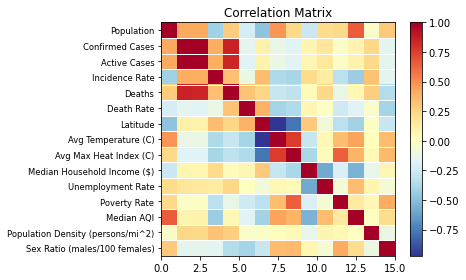

In [3]:
smg.plot_corr(np.corrcoef(df.T), ynames=columns)
plt.show()

## Q-Q Plots

We then examine the Q-Q plots. Note most variables are in some need of regularization.

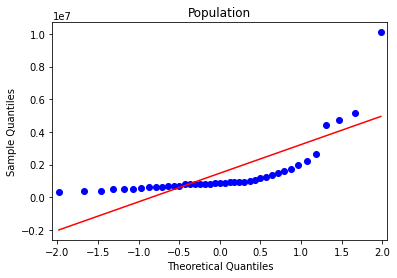

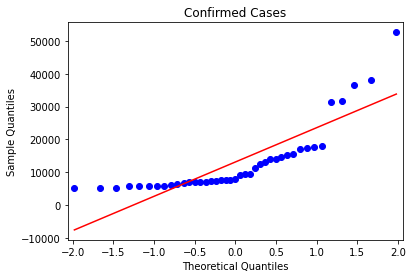

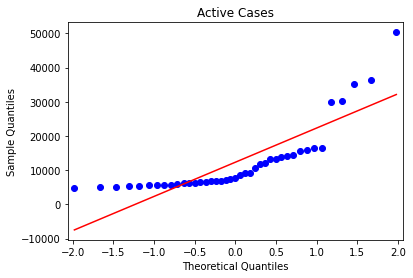

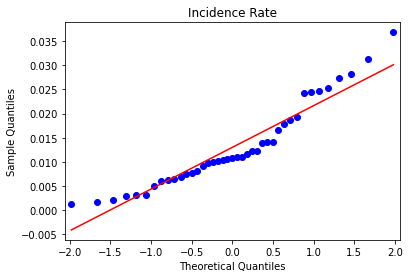

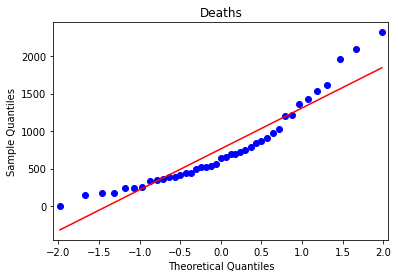

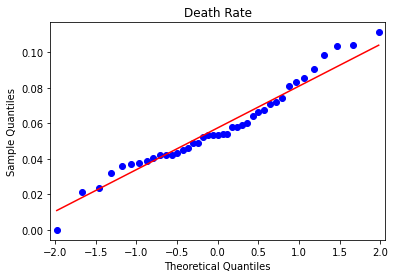

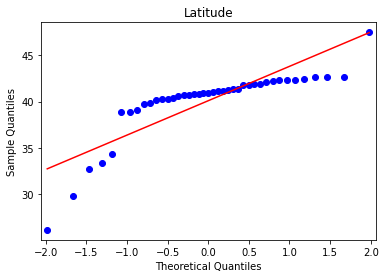

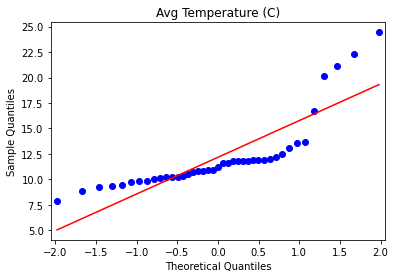

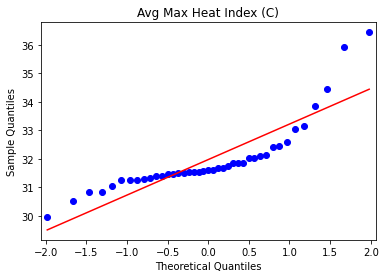

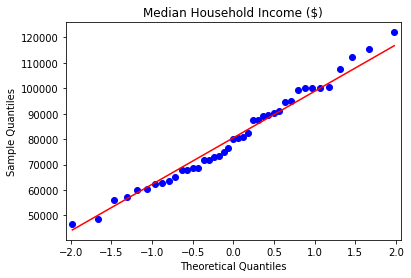

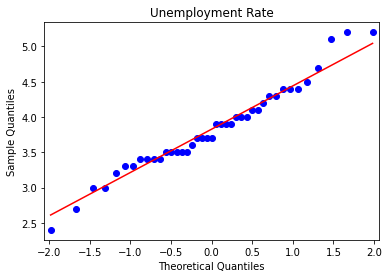

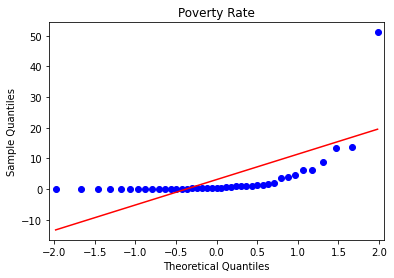

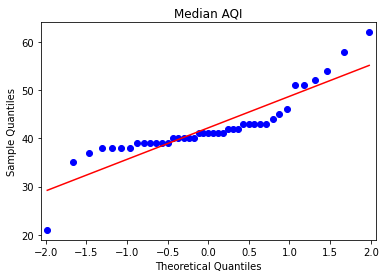

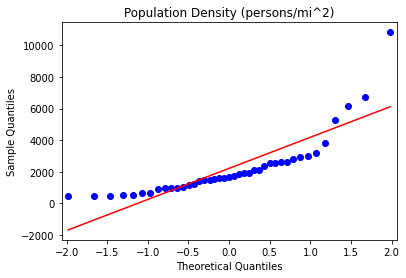

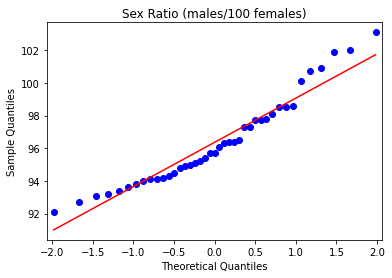

In [4]:
for column in df.columns:
    sm.qqplot(df[column], line='s')
    plt.title(column)
    plt.show()


## Multiple Linear Regressions (Unregularized and Regularized)

In [5]:
X = df.drop(columns=["Death Rate", "Incidence Rate"])
X = sm.add_constant(X.values)
Y1 = df["Death Rate"]
Y2 = df["Incidence Rate"]
model1 = sm.OLS(Y1, X)
model2 = sm.OLS(Y2, X)

### Death Rate (Unregularized)

In [6]:
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death Rate   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     10.36
Date:                Mon, 11 May 2020   Prob (F-statistic):           2.28e-07
Time:                        23:26:42   Log-Likelihood:                 130.36
No. Observations:                  41   AIC:                            -234.7
Df Residuals:                      28   BIC:                            -212.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1047      0.205      0.511      0.614      -0.315       0.525
x1          2.737e-09   2.37e-09      1.157      0.257   -2.11e-09    7.59e-09
x2          2.065e-05   2.51e-06      8.225      0.000    1.55e-05    2.58e-05
x3         -2.417e-05    2.8e-06     -8.620      0.000   -2.99e-05   -1.84e-05
x4          4.482e-05   5.31e-06      8.444      0.000    3.39e-05    5.57e-05
x5             0.0006      0.003      0.239      0.813      -0.005       0.006
x6            -0.0005      0.003     -0.216      0.831      -0.006       0.005
x7             0.0011      0.004      0.272      0.787      -0.007       0.010
x8         -4.232e-08   1.72e-07     -0.246      0.808   -3.95e-07    3.11e-07
x9            -0.0051      0.004     -1.207      0.237      -0.014       0.004
x10           -0.0002      0.000     -0.377      0.709      -0.001       0.001
x11           -0.0006      0.001     -1.056      0.300      -0.002       0.001
x12        -1.164e-06   1.07e-06     -1.085      0.287   -3.36e-06    1.03e-06
x13           -0.0006      0.001     -0.658      0.516      -0.003       0.001
==============================================================================
Omnibus:                        1.172   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                0.414
Skew:                          -0.135   Prob(JB):                        0.813
Kurtosis:                       3.412   Cond. No.                     4.94e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.8e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Incidence Rate (Unregularized)

In [7]:
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Incidence Rate   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     8.269
Date:                Mon, 11 May 2020   Prob (F-statistic):           2.31e-06
Time:                        23:26:42   Log-Likelihood:                 167.74
No. Observations:                  41   AIC:                            -309.5
Df Residuals:                      28   BIC:                            -287.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0612      0.082      0.742      0.464      -0.108       0.230
x1         -4.467e-09   9.51e-10     -4.697      0.000   -6.42e-09   -2.52e-09
x2         -8.576e-07   1.01e-06     -0.850      0.403   -2.92e-06    1.21e-06
x3          1.608e-06   1.13e-06      1.427      0.165      -7e-07    3.92e-06
x4         -2.466e-06   2.13e-06     -1.156      0.257   -6.84e-06     1.9e-06
x5            -0.0011      0.001     -1.019      0.317      -0.003       0.001
x6            -0.0002      0.001     -0.152      0.880      -0.002       0.002
x7            -0.0033      0.002     -2.002      0.055      -0.007    7.69e-05
x8          4.456e-09   6.92e-08      0.064      0.949   -1.37e-07    1.46e-07
x9             0.0036      0.002      2.100      0.045    8.75e-05       0.007
x10        -3.926e-05      0.000     -0.243      0.809      -0.000       0.000
x11        -1.596e-05      0.000     -0.074      0.941      -0.000       0.000
x12         8.709e-07   4.31e-07      2.021      0.053    -1.2e-08    1.75e-06
x13            0.0009      0.000      2.291      0.030     9.6e-05       0.002
==============================================================================
Omnibus:                       32.016   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.915
Skew:                           1.813   Prob(JB):                     2.01e-22
Kurtosis:                       9.733   Cond. No.                     4.94e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.8e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Death Rate (Regularized)

In [8]:
#model1.fit_regularized(alpha=0.1, refit=True).summary()

### Incidence Rate (Regularized)

In [9]:
#model2.fit_regularized(alpha=0.1, refit=True).summary()